<a href="https://www.kaggle.com/code/piyushjain572/t-sne?scriptVersionId=201335192" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# t-SNE: t-distributed Stochastic Neighbour Embeddings

In [5]:
# Load Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

%matplotlib inline

In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',as_frame=True,)

/opt/conda/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
print(type(mnist))
df = mnist.frame
print(type(df))
print(df.shape)

<class 'sklearn.utils._bunch.Bunch'>
<class 'pandas.core.frame.DataFrame'>
(70000, 785)


In [8]:
# Preview Data
pd.set_option('display.max_columns', None) # Show All Columns in Preview

display(df.head(n=5))

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel456,pix

In [9]:
# View Label Distribution
# MNIST Labels: 0-10
display(pd.crosstab(index=df['class'], columns='count'))

col_0,count
class,
0,6903
1,7877
2,6990
3,7141
4,6824
5,6313
6,6876
7,7293
8,6825


In [16]:
# Perform PCA: MNIST
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca_mnist = pca.fit_transform(df.drop(['class'],axis=1))

In [17]:
cols = [f'PCA_{x}' for x in range(0,30)]
pca_mnist_out = pd.DataFrame(pca_mnist,columns=cols)
pca_mnist_out['target'] = df['class'].values
pca_mnist_out['target'] = pca_mnist_out['target'].astype('int')

In [18]:
# Preview of Output Dataframe (Mnist)
display(pca_mnist_out.head(n=5))

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,PCA_28,PCA_29,target
0,122.255255,-316.233843,-51.131831,-556.897984,-49.210117,-217.069312,233.713341,188.823558,-358.799233,203.544746,210.046153,-244.279014,-57.231543,763.789181,-185.058511,-6.631028,353.086246,294.212739,274.496443,149.317489,19.829584,-75.911861,-202.506902,261.350489,34.449720,88.070745,-291.388698,181.912305,-144.541918,-115.827024,5
1,1010.494004,-289.963621,576.120746,-485.083388,-841.478357,-145.467179,-48.333483,-102.230687,34.786383,151.265594,-282.698906,-110.110307,-329.920553,96.998756,226.479861,-156.086495,-49.409530,37.944794,63.044531,-113.355801,202.534648,-94.309813,12.852969,30.161450,233.881750,198.810018,18.681478,27.951169,-362.880958,-84.469146,0
2,-58.995947,393.697445,-161.998186,529.220856,-313.159335,8.970161,-860.990204,374.289852,-78.500891,-192.717889,455.204415,-146.524163,189.119393,87.126057,163.207203,-201.765919,169.556066,-119.844567,-21.199787,-430.542242,-75.986003,4.407274,107.084854,-20.020779,-137.459904,88.274980,195.644139,123.260675,-3.012543,-275.668511,4
3,-796.965019,-607.421250,295.522701,109.112832,25.666330,697.859150,-474.508017,-99.776559,298.602294,4.532406,-424.726773,-180.322807,239.342118,158.846236,172.786572,48.425548,16.929548,191.418377,146.154058,130.011778,-62.120749,-116.997792,65.619095,-93.779057,116.944696,17.303902,-266.175341,174.580999,-2.714122,-109.446627,1
4,-391.318921,729.804184,13.906966,-242.894177,98.772994,35.925884,-87.458138,-415.778526,200.297908,106.207351,-355.237236,443.292072,-275.845096,-309.838670,-81.383008,-269.532150,9.273261,-175.672195,73.585512,-256.090338,-21.626718,-58.940113,231.803305,-2.818974,-21.009870,88.283669,-164.928635,214.360368,-127.343215,75.026877,9


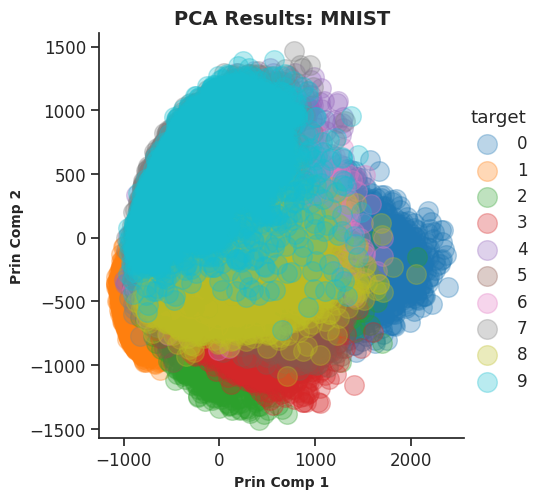

In [20]:
# Plot MNIST PCA
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='PCA_0',
           y='PCA_1',
           data=pca_mnist_out,
           fit_reg=False,
           legend=True,
           hue='target',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: MNIST', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

In [41]:
# Perform t-SNE: MNIST
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=100)
tsne_mnist = tsne.fit_transform(df.drop(['class'],axis=1))

In [42]:
print(tsne_mnist.shape)

(70000, 2)


In [43]:
# Pandas Plotting Dataframe
tsne_mnist_out = pd.DataFrame(tsne_mnist,columns=['Dim_1','Dim_2'])
tsne_mnist_out['target'] = df['class'].values
tsne_mnist_out['target'] = tsne_mnist_out['target'].astype('int')

In [44]:
# Preview of Output Dataframe (Mnist)
display(tsne_mnist_out.head(n=5))

,Dim_1,Dim_2,target
0,30.501133,4.408711,5
1,60.088181,-40.292519,0
2,10.309387,80.142548,4
3,-51.509518,-42.606941,1
4,-13.554193,45.019222,9


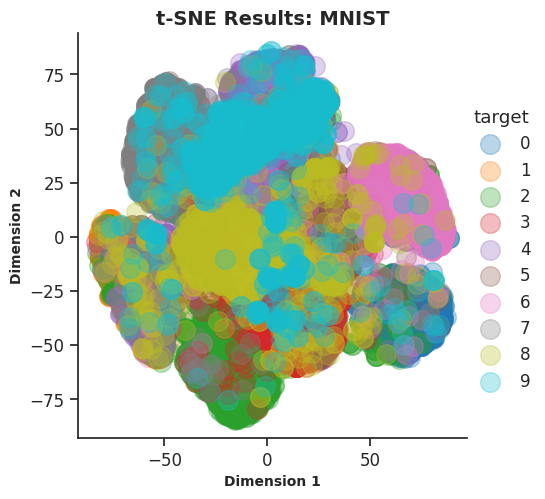

In [45]:
# Plot MNIST t-SNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='Dim_1',
           y='Dim_2',
           data=tsne_mnist_out,
           fit_reg=False,
           legend=True,
           hue='target',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: MNIST', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

In [46]:
# Perform t-SNE on PCA Results: MNIST
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=100)
pca_tsne_mnist = tsne.fit_transform(pca_mnist_out.drop(['target'],axis=1))

In [47]:
# Pandas Plotting Dataframe
pca_tsne_mnist_out = pd.DataFrame(pca_tsne_mnist,columns=['Dim_1','Dim_2'])
pca_tsne_mnist_out['target'] = pca_mnist_out['target'].values
pca_tsne_mnist_out['target'] = tsne_mnist_out['target'].astype('int')

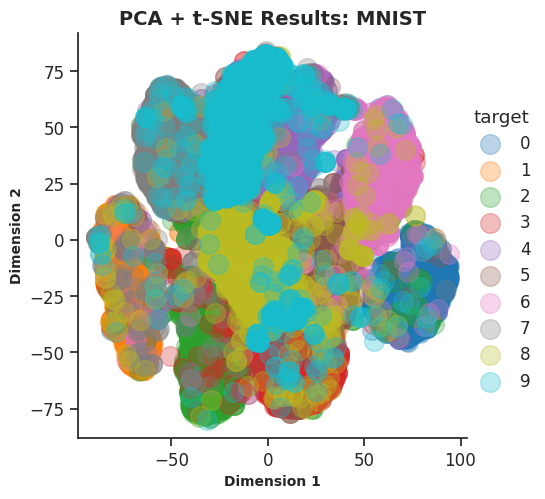

In [48]:
# Plot PCA + t-SNE: MNIST
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='Dim_1',
           y='Dim_2',
           data=pca_tsne_mnist_out,
           fit_reg=False,
           legend=True,
           hue='target',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA + t-SNE Results: MNIST', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')